      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


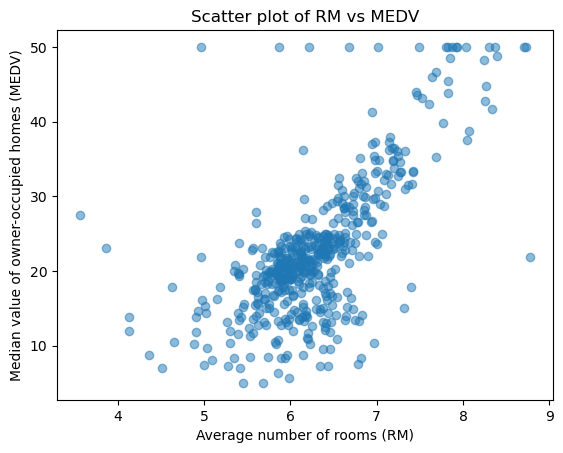

Coefficient: 9.039073142708887
Intercept: -34.22235234632531
Training MSE: 45.829021700741364
Training R-squared: 0.4800686358449543
Testing MSE: 39.09105111486995
Testing R-squared: 0.4834590168919489


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = 'boston_housing.csv'
df = pd.read_csv(file_path)

print(df.head())

plt.scatter(df['RM'], df['MEDV'], alpha=0.5)
plt.title('Scatter plot of RM vs MEDV')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

X = df[['RM']]  # Predictor
y = df['MEDV']   # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training MSE: {train_mse}')
print(f'Training R-squared: {train_r2}')

y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Testing MSE: {test_mse}')
print(f'Testing R-squared: {test_r2}')



Variance Inflation Factors:
  feature        VIF
0      RM  16.747965
1     DIS   6.880607
2     TAX  13.861510
3   INDUS   9.598374


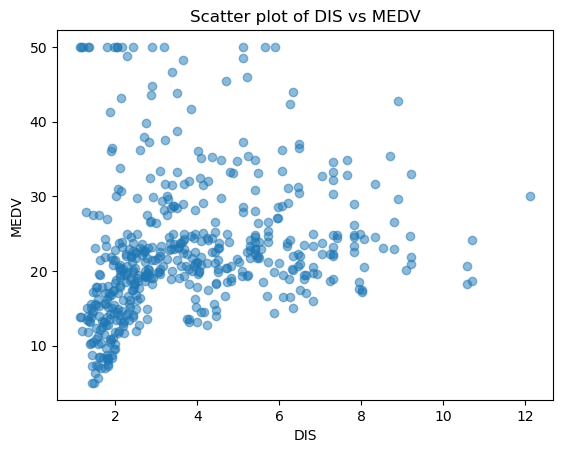

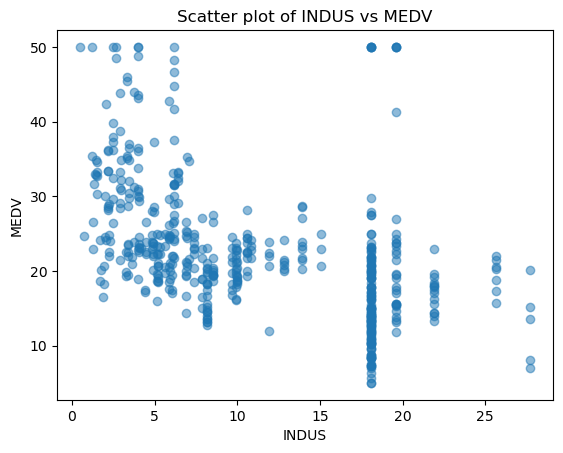

Coefficients: [-0.66966646 -0.76097327]
Intercept: 34.06036823065428
Training Set Evaluation:
Mean Squared Error (MSE): 68.79851347728464
R-squared (R2): 0.21947919382478864
Adjusted R-squared (Adj R2): 0.21483323664517429

Testing Set Evaluation:
Mean Squared Error (MSE): 52.96418122518654
R-squared (R2): 0.3001423737832417
Adjusted R-squared (Adj R2): 0.2916075246830373


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Load the dataset
file_path = 'boston_housing.csv'
df = pd.read_csv(file_path)

# Step 2: Select predictors and target variable
X = df[['RM', 'DIS', 'TAX', 'INDUS']]
y = df['MEDV']

# Step 3: Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print('Variance Inflation Factors:')
print(vif_data)

# Based on VIF values, finalize the predictors
selected_predictors = vif_data[vif_data['VIF'] < 10]['feature'].tolist()
X_final = X[selected_predictors]

# Step 4: Visualize association with target using scatter plots
for feature in X_final.columns:
    plt.scatter(X_final[feature], y, alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

# Step 5: Split data into train and test sets (67:33 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=42)

# Step 6: Build Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Display coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Step 8: Evaluate the model
# Training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
n = len(y_train)
p = X_train.shape[1]
train_adj_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)

print('Training Set Evaluation:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'R-squared (R2): {train_r2}')
print(f'Adjusted R-squared (Adj R2): {train_adj_r2}')

# Testing set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
n = len(y_test)
p = X_test.shape[1]
test_adj_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

print('\nTesting Set Evaluation:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'R-squared (R2): {test_r2}')
print(f'Adjusted R-squared (Adj R2): {test_adj_r2}')


In [1]:
import pandas as pd

# Load the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')

# Display basic info about the dataset
print(df_hr.info())
print(df_hr.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86  

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


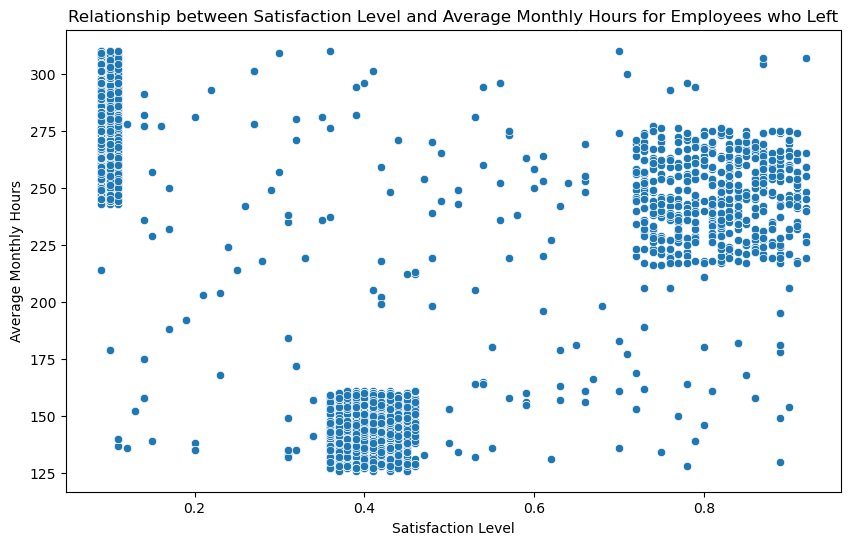

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')

# Filter employees who have left (left == 1)
left_employees = df_hr[df_hr['left'] == 1]

# Check column names to ensure accuracy
print(df_hr.columns)

# Visualize the relationship between satisfaction level and average monthly hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', data=left_employees)  # Adjusted column name
plt.title('Relationship between Satisfaction Level and Average Monthly Hours for Employees who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly Hours')
plt.show()


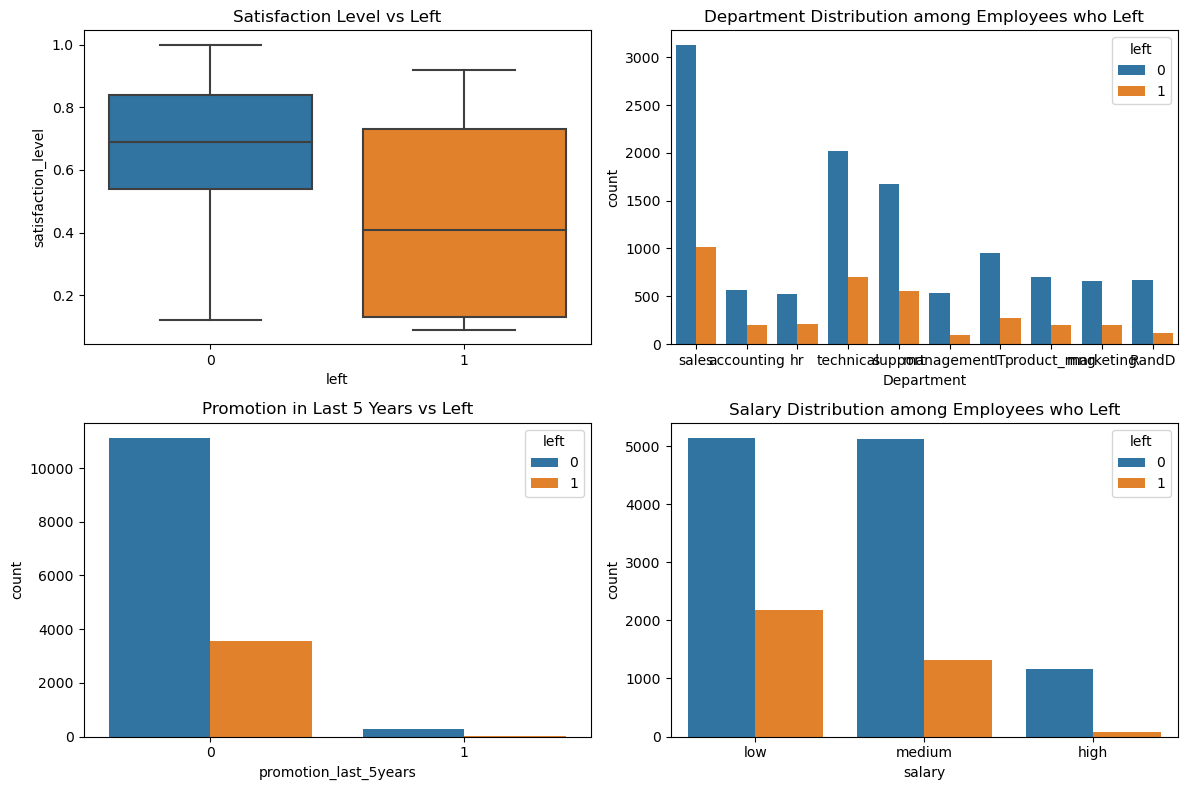

In [5]:
# Effect of satisfaction level, department, promotion, and salary on employees who left
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df_hr)
plt.title('Satisfaction Level vs Left')

plt.subplot(2, 2, 2)
sns.countplot(x='Department', hue='left', data=df_hr)
plt.title('Department Distribution among Employees who Left')

plt.subplot(2, 2, 3)
sns.countplot(x='promotion_last_5years', hue='left', data=df_hr)
plt.title('Promotion in Last 5 Years vs Left')

plt.subplot(2, 2, 4)
sns.countplot(x='salary', hue='left', data=df_hr)
plt.title('Salary Distribution among Employees who Left')

plt.tight_layout()
plt.show()


In [7]:
print(df_hr.columns)
print(df_hr.head())
X = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df_hr = pd.read_csv('HR_comma_sep.csv')

# Check column names to ensure accuracy
print(df_hr.columns)

# Filter employees who have left (left == 1)
left_employees = df_hr[df_hr['left'] == 1]

# Select predictors and target variable
X = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
           'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
y = df_hr['left']

# Encode categorical variables if necessary (salary is categorical)
X = pd.get_dummies(X, columns=['salary'], drop_first=True)

# Split data into train and test sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Build a Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification report on test set
print(classification_report(y_test, y_test_pred))



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1              

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Step 2: Prepare data
X = df['age,"job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"']
y = df['age,"job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"']  # Target variable

# Step 3: Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
model.fit(X_train, y_train)

# Step 5: Evaluate model performance
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


ValueError: could not convert string to float: '29,"admin.","married","university.degree","no","no","no","cellular","dec","mon",77,3,999,1,"failure",-3,92.713,-33,0.709,5023.5,"no"'

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,"age,""job"",""marital"",""education"",""default"",""housing"",""loan"",""contact"",""month"",""day_of_week"",""duration"",""campaign"",""pdays"",""previous"",""poutcome"",""emp.var.rate"",""cons.price.idx"",""cons.conf.idx"",""euribor3m"",""nr.employed"",""y"""
0,"56,""housemaid"",""married"",""basic.4y"",""no"",""no"",..."
1,"57,""services"",""married"",""high.school"",""unknown..."
2,"37,""services"",""married"",""high.school"",""no"",""ye..."
3,"40,""admin."",""married"",""basic.6y"",""no"",""no"",""no..."
4,"56,""services"",""married"",""high.school"",""no"",""no..."
...,...
41183,"73,""retired"",""married"",""professional.course"",""..."
41184,"46,""blue-collar"",""married"",""professional.cours..."
41185,"56,""retired"",""married"",""university.degree"",""no..."
41186,"44,""technician"",""married"",""professional.course..."


In [4]:
df.columns

Index(['age,"job","marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"'], dtype='object')

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Load the dataset

df = pd.read_csv('data_banknote_authentication.csv')
df

# Assign column names
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Display the first few rows and column names
print(df.head())
print(df.columns)


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [2]:
# Separate predictors and target variable
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
y = df['class']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Instantiate the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression()

In [4]:
# Predict on training and test data
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

train_precision = precision_score(y_train, train_preds)
test_precision = precision_score(y_test, test_preds)

train_recall = recall_score(y_train, train_preds)
test_recall = recall_score(y_test, test_preds)

# Print metrics
print(f'Training Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}')


Training Accuracy: 0.9917, Precision: 0.9838, Recall: 0.9977
Testing Accuracy: 0.9879, Precision: 0.9837, Recall: 0.9891


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset

df = pd.read_csv('bank-additional-full.csv')

# Selecting predictors and target variable
predictors = df[['duration', 'age']]
target = df['y']

# Encode categorical target variable 'y' to numerical values
le = LabelEncoder()
target = le.fit_transform(target)

# Splitting data into train and test sets (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.4, random_state=42)


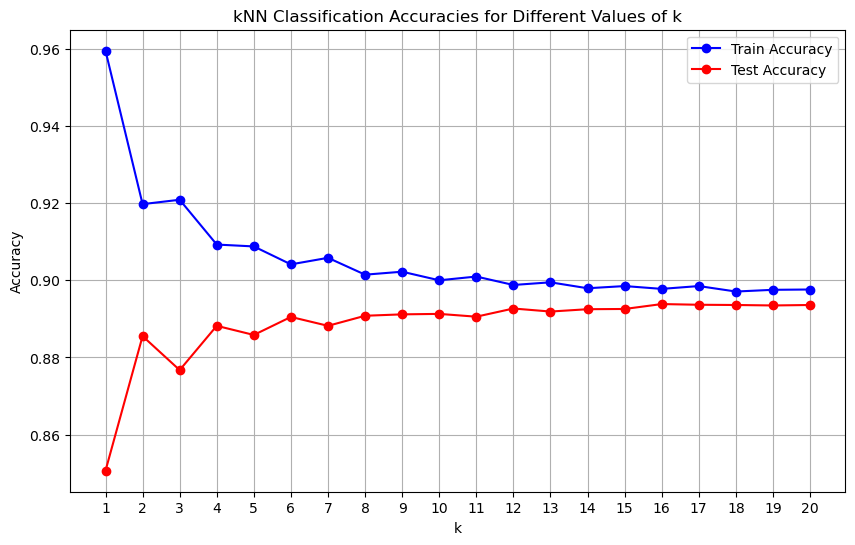

In [2]:
# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []
k_values = range(1, 21)  # Trying k values from 1 to 20

# Build kNN models for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.title('kNN Classification Accuracies for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the modified Iris dataset
iris_df = pd.read_csv('iris-modified.csv')

# Display the first few rows of the dataset to understand its structure
print(iris_df.head())

# Check for missing values
print(iris_df.isnull().sum())

# Assuming there are no missing values, proceed with scaling the features
# Separate features and target variable if applicable
X = iris_df.drop(columns=['Species'])  # Adjust this if 'Species' is not the target variable
y = iris_df['Species']  # Adjust this if 'Species' is the target variable

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Analyze cluster sizes
cluster_labels = kmeans.labels_
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print("Cluster Sizes:", cluster_sizes)

# Add cluster labels to the original dataframe
iris_df['Cluster'] = cluster_labels

# Visualize clusters using pair plots
sns.pairplot(iris_df, hue='Cluster', palette='viridis')
plt.show()


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
dtype: int64


KeyError: "['Species'] not found in axis"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
iris_modified = pd.read_csv('iris-modified.csv')

# Display the first few rows of the dataset to understand its structure
print(iris_modified.head())

# Check for missing values
print(iris_modified.isnull().sum())

# Assuming there are no missing values, proceed with scaling the features
X = iris_modified.drop(columns=['Species'])  # Features
y = iris_modified['Species']  # Target variable (if applicable)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Analyze cluster sizes
cluster_labels = kmeans.labels_
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
print("Cluster Sizes:\n", cluster_sizes)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Clusters in Iris Dataset (Modified)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
dtype: int64


KeyError: "['Species'] not found in axis"

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the dataset

df = pd.read_csv('bank-additional-full.csv')

# Exclude 'duration' from predictors and consider remaining columns as predictors
predictors = df.drop(['duration', 'y'], axis=1)
target = df['y']

# Encode categorical variables
le = LabelEncoder()
for col in predictors.select_dtypes(include=['object']).columns:
    predictors[col] = le.fit_transform(predictors[col])

# Split data into train and test sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)


In [5]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_classifier.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Evaluate the initial model
print("Initial Model Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("")

# Print precision and recall for each class
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Initial Model Performance:
Training Accuracy: 0.9953566009104704
Test Accuracy: 0.8336974993930566

Classification Report on Test Data:
              precision    recall  f1-score   support

          no       0.91      0.90      0.91      7303
         yes       0.30      0.34      0.32       935

    accuracy                           0.83      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.84      0.83      0.84      8238



In [6]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score from GridSearchCV
print("Best Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
print("")

# Use the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Predictions using the best model
y_test_pred_best = best_dt_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Model Performance:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("")
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters Found:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation Score: 0.8936267071320183

Tuned Model Performance:
Test Accuracy: 0.8941490653071134

Classification Report on Test Data:
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7303
         yes       0.57      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.74      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Load the dataset

df = pd.read_csv('data_banknote_authentication.csv')

# Assign column names
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Separate predictors (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (not strictly necessary for tree-based models, but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")


Decision Tree Classifier Metrics:
Accuracy: 0.9818
Precision: 1.0000
Recall: 0.9606
F1-score: 0.9799


In [3]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test_scaled)

# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("\nLogistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")



Logistic Regression Classifier Metrics:
Accuracy: 0.9782
Precision: 0.9690
Recall: 0.9843
F1-score: 0.9766


In [4]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")



Random Forest Classifier Metrics:
Accuracy: 0.9927
Precision: 1.0000
Recall: 0.9843
F1-score: 0.9921


In [5]:
# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred_ada = ada_classifier.predict(X_test_scaled)

# Evaluation metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

print("\nAdaBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_ada:.4f}")
print(f"Precision: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1-score: {f1_ada:.4f}")



AdaBoost Classifier Metrics:
Accuracy: 0.9964
Precision: 1.0000
Recall: 0.9921
F1-score: 0.9960


In [6]:
# Create a DataFrame to compare metrics
metrics_df = pd.DataFrame({
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'AdaBoost': [accuracy_ada, precision_ada, recall_ada, f1_ada]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

print("\nComparison of Model Performances:")
print(metrics_df)



Comparison of Model Performances:
           Decision Tree  Logistic Regression  Random Forest  AdaBoost
Accuracy        0.981818             0.978182       0.992727  0.996364
Precision       1.000000             0.968992       1.000000  1.000000
Recall          0.960630             0.984252       0.984252  0.992126
F1-score        0.979920             0.976562       0.992063  0.996047
